In [172]:
%pylab inline
import scipy.ndimage
import skimage.feature
import skimage.filters
import skimage.morphology
pylab.rcParams['figure.figsize'] = (15.0, 10.0)
pylab.rcParams[u'image.cmap'] = 'cubehelix'

Populating the interactive namespace from numpy and matplotlib


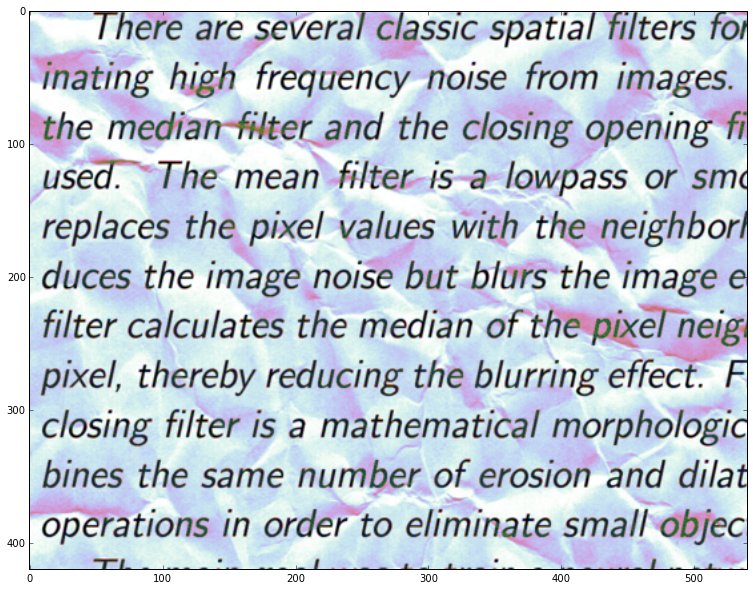

In [173]:
X = imread('train/108.png')
y = imread('train_cleaned/108.png')
imshow(X)

((420, 540), (420, 540))

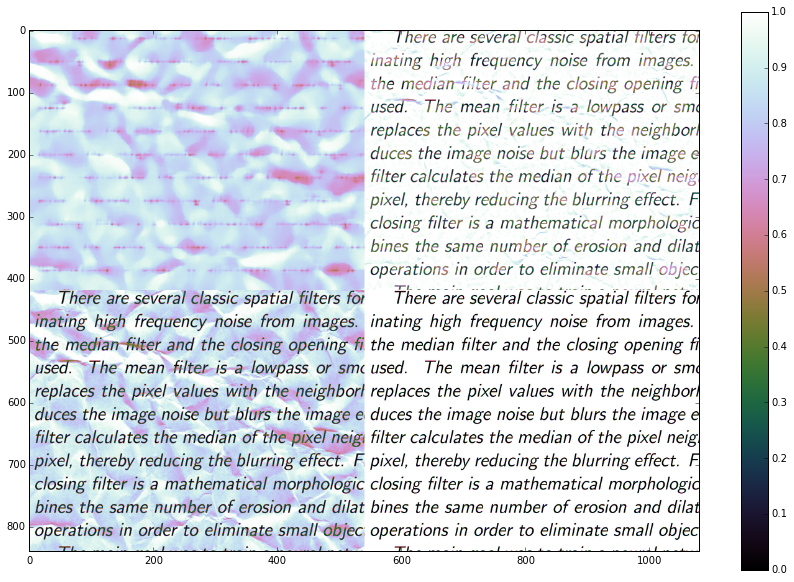

In [186]:
bg = (skimage.filters.median(X, np.ones((15,15))))/255.0
fg = X - bg
fg[fg > 0] = 0
m1 = np.min(fg)
m2 = np.max(fg)
fg = (fg - m1) / (m2 - m1)
imshow(
    np.concatenate([
        np.concatenate([bg, X]),
        np.concatenate([fg, y])
    ], axis=1)
)
pyplot.colorbar()
bg.shape, X.shape

<matplotlib.colorbar.Colorbar instance at 0x7fc80c3fc3b0>

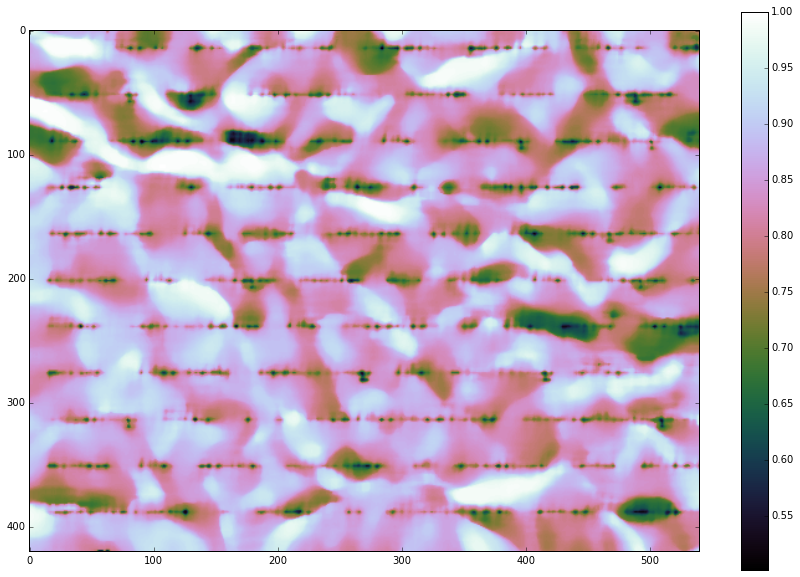

In [187]:
imshow(bg)
pyplot.colorbar()

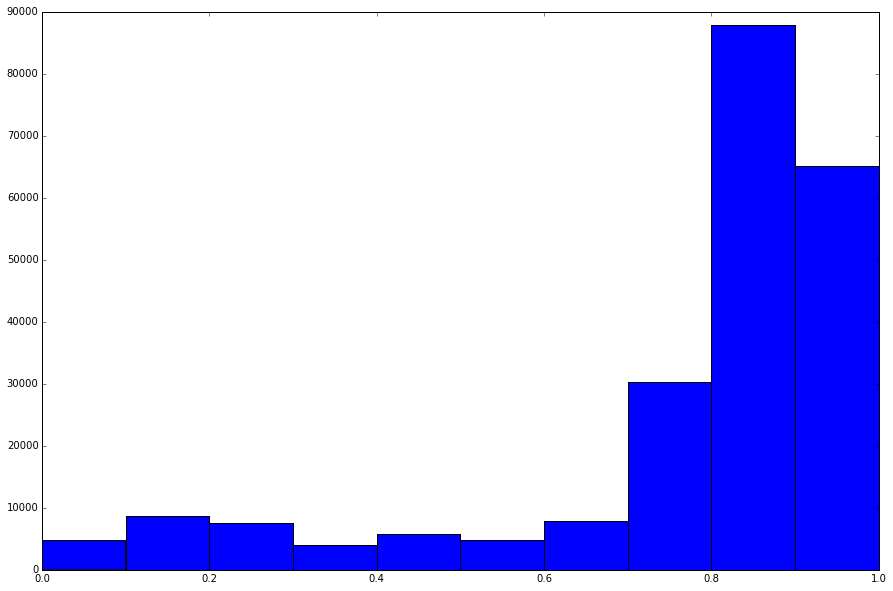

In [188]:
_ = hist(X.flatten())

In [189]:
import scipy.ndimage.measurements
import scipy.ndimage.morphology
yt = np.invert(y > 0.9)
#dense_structure = np.ones((3, 3))
labels, nlabels = scipy.ndimage.measurements.label(scipy.ndimage.morphology.binary_opening(yt))

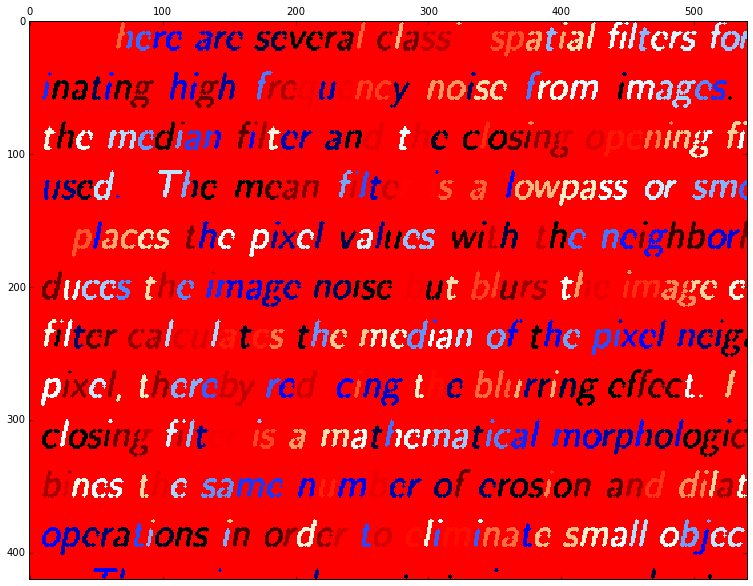

In [190]:
matshow(labels, cmap='flag')

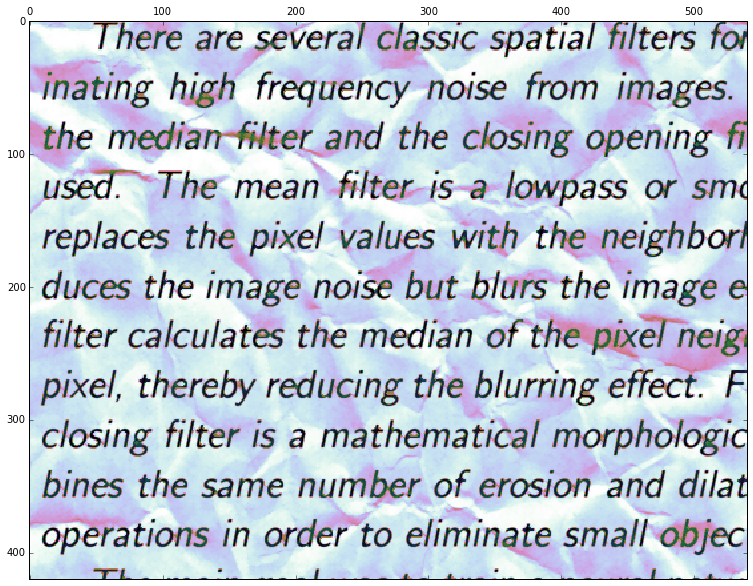

In [191]:
matshow(skimage.morphology.opening(X))

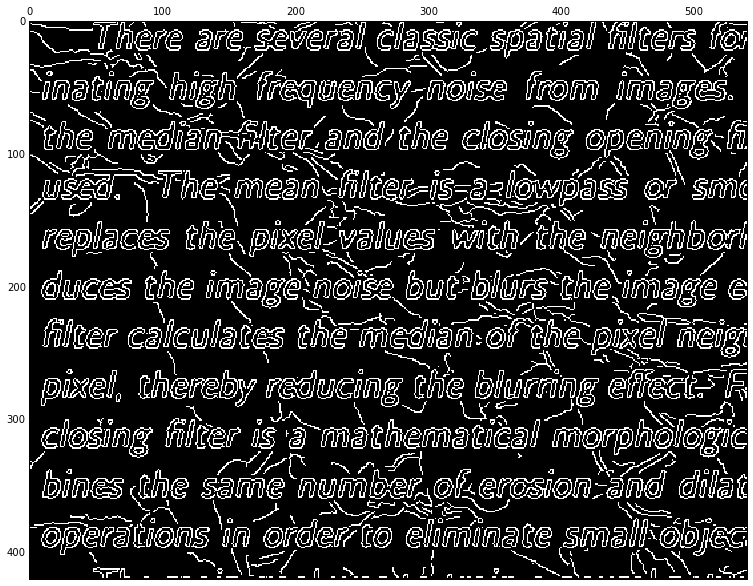

In [192]:
matshow(skimage.feature.canny(skimage.morphology.opening(X)))